In [1]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms


import utils as utils
import model as model

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


##### Download the training and the test data

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=model.train_transforms())
test_data = datasets.MNIST('../data', train=False, download=True, transform=model.test_transforms())

##### Build the dataloaders

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True,}
test_loader = model.test_loader(test_data, **kwargs)
train_loader = model.train_loader(train_data, **kwargs)

##### Look at some of the data

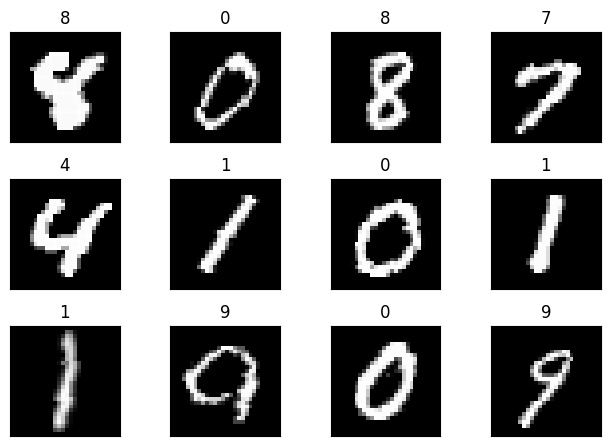

In [5]:
batch_data, batch_label = next(iter(train_loader)) 
model.show_data(batch_data, batch_label)

##### Initialize variables to use in making plots later on

In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

##### Train a model

In [7]:
device = "cpu"
model = model.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss()
criterion = F.nll_loss
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = utils.train(model, 
                                        device, 
                                        train_loader,
                                        optimizer, 
                                        criterion, 
                                        train_acc,
                                        train_losses,)
  test_acc, test_losses = utils.test(model, 
                                     device, 
                                     test_loader, 
                                     criterion,
                                     test_acc,
                                     test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2051 Batch_id=117 Accuracy=53.34: 100%|██████████| 118/118 [00:51<00:00,  2.28it/s]


Test set: Average loss: 0.2265, Accuracy: 9297/10000 (92.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2077 Batch_id=117 Accuracy=94.06: 100%|██████████| 118/118 [00:50<00:00,  2.34it/s]


Test set: Average loss: 0.0931, Accuracy: 9722/10000 (97.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1012 Batch_id=117 Accuracy=96.26: 100%|██████████| 118/118 [00:49<00:00,  2.40it/s]


Test set: Average loss: 0.0609, Accuracy: 9814/10000 (98.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1042 Batch_id=117 Accuracy=97.19: 100%|██████████| 118/118 [00:50<00:00,  2.33it/s]


Test set: Average loss: 0.0476, Accuracy: 9847/10000 (98.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0419 Batch_id=117 Accuracy=97.60: 100%|██████████| 118/118 [00:50<00:00,  2.35it/s]


Test set: Average loss: 0.0451, Accuracy: 9858/10000 (98.58%)

Adjusting learning rate of group 0 to 1.0000e-02.


##### Visualize the training performance 

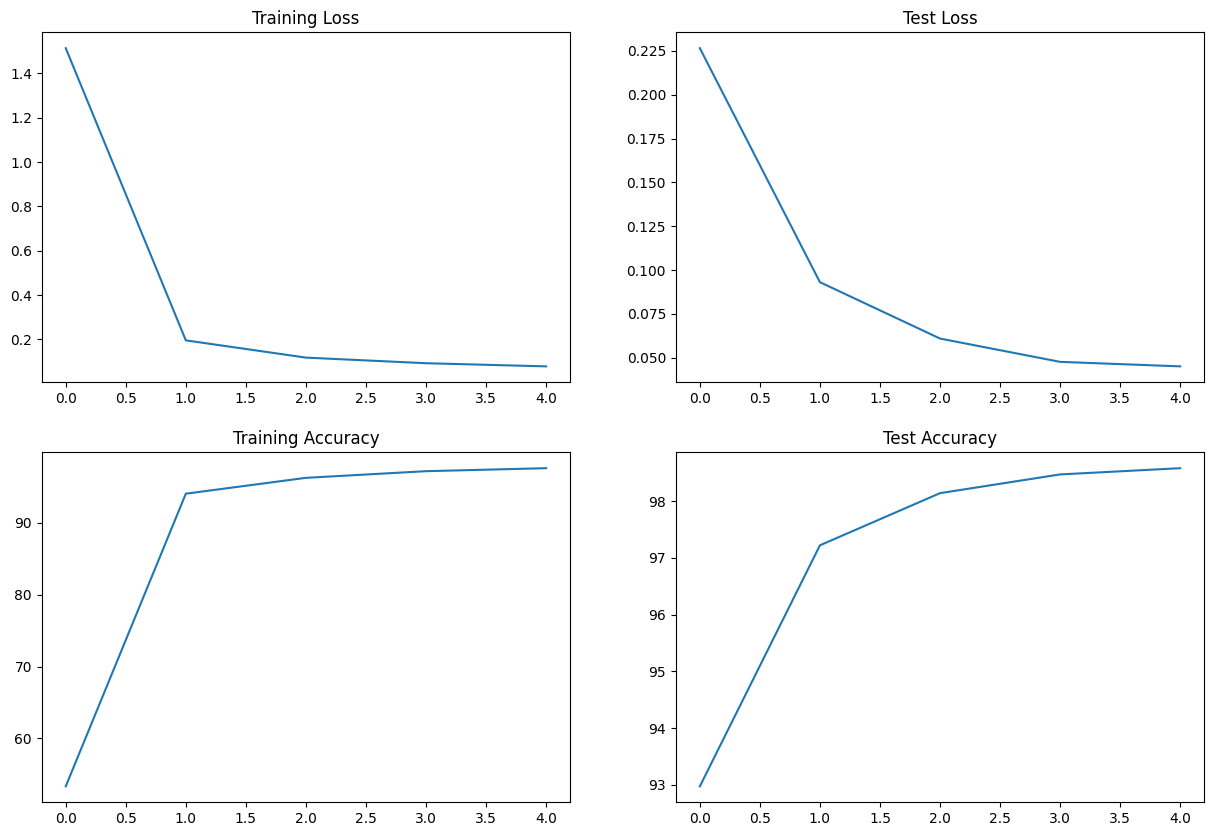

In [8]:
utils.plot_losses_accuracies(train_acc, train_losses, test_acc, test_losses,)